In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/uci-secom - uci-secom.csv')

In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df.isnull().sum()

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
df['Pass/Fail'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1567 entries, 0 to 1566
Series name: Pass/Fail
Non-Null Count  Dtype
--------------  -----
1567 non-null   int64
dtypes: int64(1)
memory usage: 12.4 KB


In [ ]:
# fail -> -1
# pass -> 1

In [ ]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile

        num_missing = df[column].isnull().sum()

        if num_missing > 0:
            random_values = np.random.uniform(Q1, Q3, size=num_missing)  # Avoids extreme values
            random_series = pd.Series(random_values, index=df[column].index[df[column].isnull()])
            df[column].fillna(random_series, inplace=True)


<ipython-input-10-1bc7cf050fbe>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(random_series, inplace=True)
<ipython-input-10-1bc7cf050fbe>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
X = df.drop(columns=['Pass/Fail','Time'])

In [ ]:
y = df['Pass/Fail']

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005215,107.279950,0.5005,0.0118,0.0035,2.3630,0.027247,0.015603,0.00434,112.818763
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.00600,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.01480,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.00440,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005219,53.939675,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.00440,73.843200


In [ ]:
y.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
print(acc)

0.8949044585987261


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1253, 590)
(314, 590)


# Dropping duplicates

In [ ]:
duplicates = {}
for i in X_train.columns:
  for j in X_train.columns:
    if i!=j and X_train[i].equals(X_train[j]):
      duplicates.setdefault(i,[]).append(j)


In [ ]:
for key,values in duplicates.items():
  print(f"Column '{key}' is duplicated in: {values}")

Column '13' is duplicated in: ['52', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
Column '49' is duplicated in: ['69']
Column '52' is duplicated in: ['13', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '2

In [ ]:
for duplicate_cols in duplicates.values():
  for cols in duplicate_cols:
    X_train.drop(columns=cols,inplace =True , errors='ignore')
    X_test.drop(columns = cols , inplace=True,errors='ignore')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1253, 476)
(314, 476)


# Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vr = VarianceThreshold(threshold=0.05)
vr.fit(X_train)


VarianceThreshold(threshold=0.05)

In [ ]:
columns =X_train.columns[ vr.get_support()]

In [ ]:
columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286],
      dtype='int64', length=287)

In [ ]:
X_train=vr.transform(X_train)
X_test = vr.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1253, 287)
(314, 287)


# correlation

In [ ]:
corr_matrix = X_train.corr()

<Axes: >

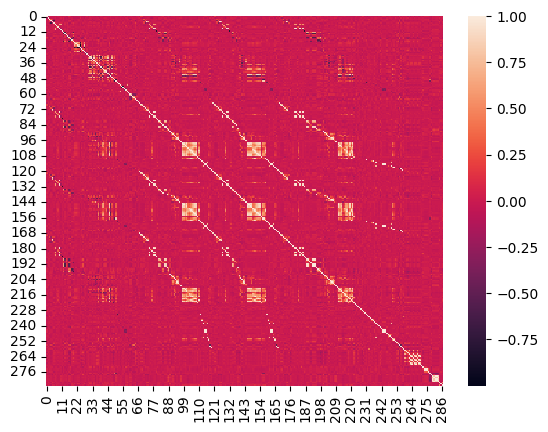

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
columns=corr_matrix.columns
columnstodrop = []
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    if corr_matrix.loc[columns[i],columns[j]]>0.95:
      columnstodrop.append(columns[j])
columnstodrop=set(columnstodrop)
print(len(columnstodrop))

93


In [ ]:
X_train.drop(columns=columnstodrop,inplace=True,axis=1,errors='ignore')
X_test.drop(columns=columnstodrop,inplace=True,axis=1,errors = 'ignore')


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1253, 194)
(314, 194)


In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_pred,y_test)

0.8789808917197452